<img src="Logo-for-use-in-white-background.png" style="width:300px;height:60pz"/>


# Business Intelligence & Big Data Analysis (7009)
## Heart Failure Prediction
### Instructor: G. Nikolaou (Γ. Νικολάου)
### Author: Η. Xhindi (Χ. Τζίντι)

### Purpose of work
Τhis work demostrates the concepts we have learnt during our lectures and workshops. Target of this work is, after selecting a dataset of our choice, to do an exploratory data analysis. This analysis should make us understand our data set, available features, possible or even necessary feature processing tools to prepare our data set for modeling. We are using Machine Learning (ML) methods for our data in order to evaluate our model and present our findings.

Furhtermore, more specifically for our dataset, our purpose is to find valualble informations from people who suffer from CVDs in order to help them and generally people that are threaten by them.

### About the dataset
Heart diseases or Cardiovascular diseases(CVDs) are the leading cause of death for both men and women. This is the case worldwide.
Heart failure is one of the most common events caused by CVDs. This dataset provide us with twelve (12) features that can be used to predict mortality by heart failure.

People with CVDs or those who are at high risk, need to take the appropriate medical treatment. Most CVDs can be prevented by avoiding risk behaviours and by living a 'healthier' way of life-style. Analyzing the dataset and using Machine Learning models on it can be a great help for the experts (physician, etc.) in order to save the people in need.

Credits to the authors of dataset: Davide Chicco & Giuseppe Jurman https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

<img src="istockphoto-1285257615-612x612.jpg" style="width:400px;height:80pz"/>

### Eleven (11) features and a one (1) target category variable
- **age:** Age (years)
- **anaemia:** Decrease of red blood cells or hemoglobin (boolean)
- **creatinine_phosphokinase:** Level of the CPK enzyme in the blood (mcg/L)
- **diabetes:** If the patient has diabetes (boolean)
- **ejection_fraction:** Percentage of blood leaving the heart at each contraction (percentage)
- **high_blood_pressure:** If the patient has hypertension (boolean)
- **platelets:** Platelets in the blood (kiloplatelets/mL)
- **serum_creatinine:** Level of serum creatinine in the blood (mg/dL)
- **serum_sodium:** Level of serum sodium in the blood (mEq/L)
- **sex:** Woman or man (binary)
- **smoking:** If the patient smokes or not (boolean)
- **time:** Follow-up period (days)



- **DEATH_EVENT:** If the patient deceased during the follow-up period (boolean)

### ⚠️ Disclaimer !!!

- The dataset was last updated 20/06/2020 04:03:20 GMT+0300 (Version 1).
- All the following is meant to be used as helping information for a certified heathcare professional and nothing more.
- All the following is presented as results of an exploratory data analysis by an engineer. It does not mean to be a medical advice. This document should not take the place of a licensed medical care.
- This results ARE NOT ALWAYS representive of the actual situation, as our dataset does not have so many samples.
- Always consult a physician for all medical advice. 

## LET'S START 😊❤️️

#### Importing the necessary libraries 📕

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#### Importing the dataset 🗂️

In [2]:
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

#### Dataset exploration 🔍

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# No. rows=samples, columns=features
data.shape 

(299, 13)

In [5]:
# general statistics of the datase
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
# first (10) rows(samples) 
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [7]:
# features of dataset
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
# data types
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [9]:
# count data by feature
data.count()

age                         299
anaemia                     299
creatinine_phosphokinase    299
diabetes                    299
ejection_fraction           299
high_blood_pressure         299
platelets                   299
serum_creatinine            299
serum_sodium                299
sex                         299
smoking                     299
time                        299
DEATH_EVENT                 299
dtype: int64

In [10]:
# unique values for each feature
cols = data.columns
for i in cols:
    print(i)
    print(data[i].unique())

age
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anaemia
[0 1]
creatinine_phosphokinase
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 2442 

In [11]:
# check for values that are not recorded
data.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [12]:
# counting records without values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Some interesting remarks ❗

We will see the percentage of people who died based on if they had anemia, diabetes, high blood pressure and also if they smoked.

In [13]:
# No. people with anaemia
pw_anaemia = data.anaemia[data.anaemia==1].count()
# dead people with anaemia
dead_anaemia = data.DEATH_EVENT[(data.DEATH_EVENT==1) & (data.anaemia==1)].count()

# No. people with diabetes
pw_diabetes = data.diabetes[data.diabetes==1].count()
# dead people with diabetes
dead_diabetes = data.DEATH_EVENT[(data.DEATH_EVENT==1) & (data.diabetes==1)].count()

# No. people with high blood pressure
pw_hbp = data.high_blood_pressure[data.high_blood_pressure==1].count()
# dead people with high blood pressure
dead_hbp = data.DEATH_EVENT[(data.DEATH_EVENT==1) & (data.high_blood_pressure==1)].count()

# No. of people who smoked
smokers = data.DEATH_EVENT[data.smoking==1].count()
# dead people who smoked
dead_smokers = data.DEATH_EVENT[(data.DEATH_EVENT==1) & (data.smoking==1)].count()

In [14]:
(dead_anaemia/pw_anaemia)*100

35.65891472868217

💀 People with anaemia have an increased chance of 35.65891472868217% of death from CVDs.

In [15]:
(dead_diabetes/pw_diabetes)*100

32.0

💀 People with diabetes have an increased chance of 32.0% of death from CVDs

In [16]:
(dead_hbp/pw_hbp)*100

37.142857142857146

💀 People with high blood pressure have an increased chance of 37.142857142857146% of death from CVDs.

In [17]:
(dead_smokers/smokers)*100

31.25

💀 Smokers have an increased chance of 31.25% of death from CVDs.

---

#### Some interesting remarks (PART II) ❗

We will see the some information of people based on their concentration on creatinine phosphokinase (CPK), serum creatinine, serum sodium, plateletes and their ejection fraction.

In [18]:
# the median concentration of CPK of people of the dataset
data.creatinine_phosphokinase.mean()

581.8394648829432

In [19]:
# the median concentration of CPK of alive people
data.creatinine_phosphokinase[data.DEATH_EVENT==0].mean()

540.0541871921182

In [20]:
# the median concentration of CPK of people who died
data.creatinine_phosphokinase[data.DEATH_EVENT==1].mean()

670.1979166666666

In [21]:
a_mCPK = data.creatinine_phosphokinase.mean()
d_mCPK = data.creatinine_phosphokinase[data.DEATH_EVENT==1].mean()
((d_mCPK/a_mCPK) -1)*100

15.186053390431287

🤢 The average person who dies from CVDs has 15.186053390431287% more CPK.

In [22]:
# the median concentration of serum creatinine of all people
data.serum_creatinine.mean()

1.393879598662207

In [23]:
# the median concentration of serum creatinine of alive people
data.serum_creatinine[data.DEATH_EVENT==0].mean()

1.184876847290641

In [24]:
# the median concentration of serum creatinine of people who died
data.serum_creatinine[data.DEATH_EVENT==1].mean()

1.8358333333333332

In [25]:
a_mSC = data.serum_creatinine[data.DEATH_EVENT==0].mean()
d_mSC = data.serum_creatinine[data.DEATH_EVENT==1].mean()
((d_mSC/a_mSC) -1)*100

54.9387463795229

🤢 The average person who dies from CVDs has 54.9387463795229% more serum creatine.

In [26]:
# the median concentration of serum creatinine of all people
data.serum_sodium.mean()

136.62541806020067

In [27]:
# the median concentration of serum creatinine of alive people
data.serum_sodium[data.DEATH_EVENT==0].mean()

137.2167487684729

In [28]:
# the median concentration of serum creatinine of people who died
data.serum_sodium[data.DEATH_EVENT==1].mean()

135.375

In [29]:
a_mSS = data.serum_sodium[data.DEATH_EVENT==0].mean()
d_mSS = data.serum_sodium[data.DEATH_EVENT==1].mean()
((d_mSS/a_mSS) -1)*100

-1.3422186322024854

🤢 The average person who dies from CVDs has 1.3422186322024854% less serum sodium.

In [30]:
# the median concentration of platelets of all people
data.platelets.mean()

263358.02926421416

In [31]:
# the median concentration of serum creatinine of alive people
data.platelets[data.DEATH_EVENT==0].mean()

266657.4899014779

In [32]:
# the median concentration of serum creatinine of people who died
data.platelets[data.DEATH_EVENT==1].mean()

256381.0447916667

In [33]:
a_mPLT = data.platelets[data.DEATH_EVENT==0].mean()
d_mPLT = data.platelets[data.DEATH_EVENT==1].mean()
((d_mPLT/a_mPLT) -1)*100

-3.853799536479552

🤢 The average person who dies from CVDs has 3.853799536479552% less serum plateletes.

In [34]:
# the median concentration of serum creatinine of all people
data.ejection_fraction.mean()

38.08361204013378

In [35]:
# the median concentration of serum creatinine of alive people
data.ejection_fraction[data.DEATH_EVENT==0].mean()

40.26600985221675

In [36]:
# the median concentration of serum creatinine of people who died
data.ejection_fraction[data.DEATH_EVENT==1].mean()

33.46875

In [37]:
a_mEF = data.ejection_fraction[data.DEATH_EVENT==0].mean()
d_mEF = data.ejection_fraction[data.DEATH_EVENT==1].mean()
((d_mEF/a_mEF) -1)*100

-16.880887570344992

🤢 The Percentage of blood leaving the heart at each contraction of a person who dies from CVDs has 16.880887570344992% less ejection fraction.

#### Propabilities by aging 👴👵

In [38]:
#oldest age for person in our dataset
data.age.max()

95.0

In [39]:
#youngest age for person who in our dataset
data.age.min()

40.0

In [40]:
#oldest age for person who died in our dataset
data.age[data.DEATH_EVENT==1].max()

95.0

In [41]:
#youngest age for person who died in our dataset
data.age[data.DEATH_EVENT==1].min()

42.0

In [42]:
data.age[data.DEATH_EVENT==1].mean()

65.21528125

🤒 The average age of a person who dies from CVDs is 65.2 (65.21528125) years old.

In [43]:
# converting age type from floats to integers
#data.age = data.age.astype('int')

## Graphs  📈

The following sum of graphs contains histograms for each feature as well as scatter diagrams for feature pairs. 

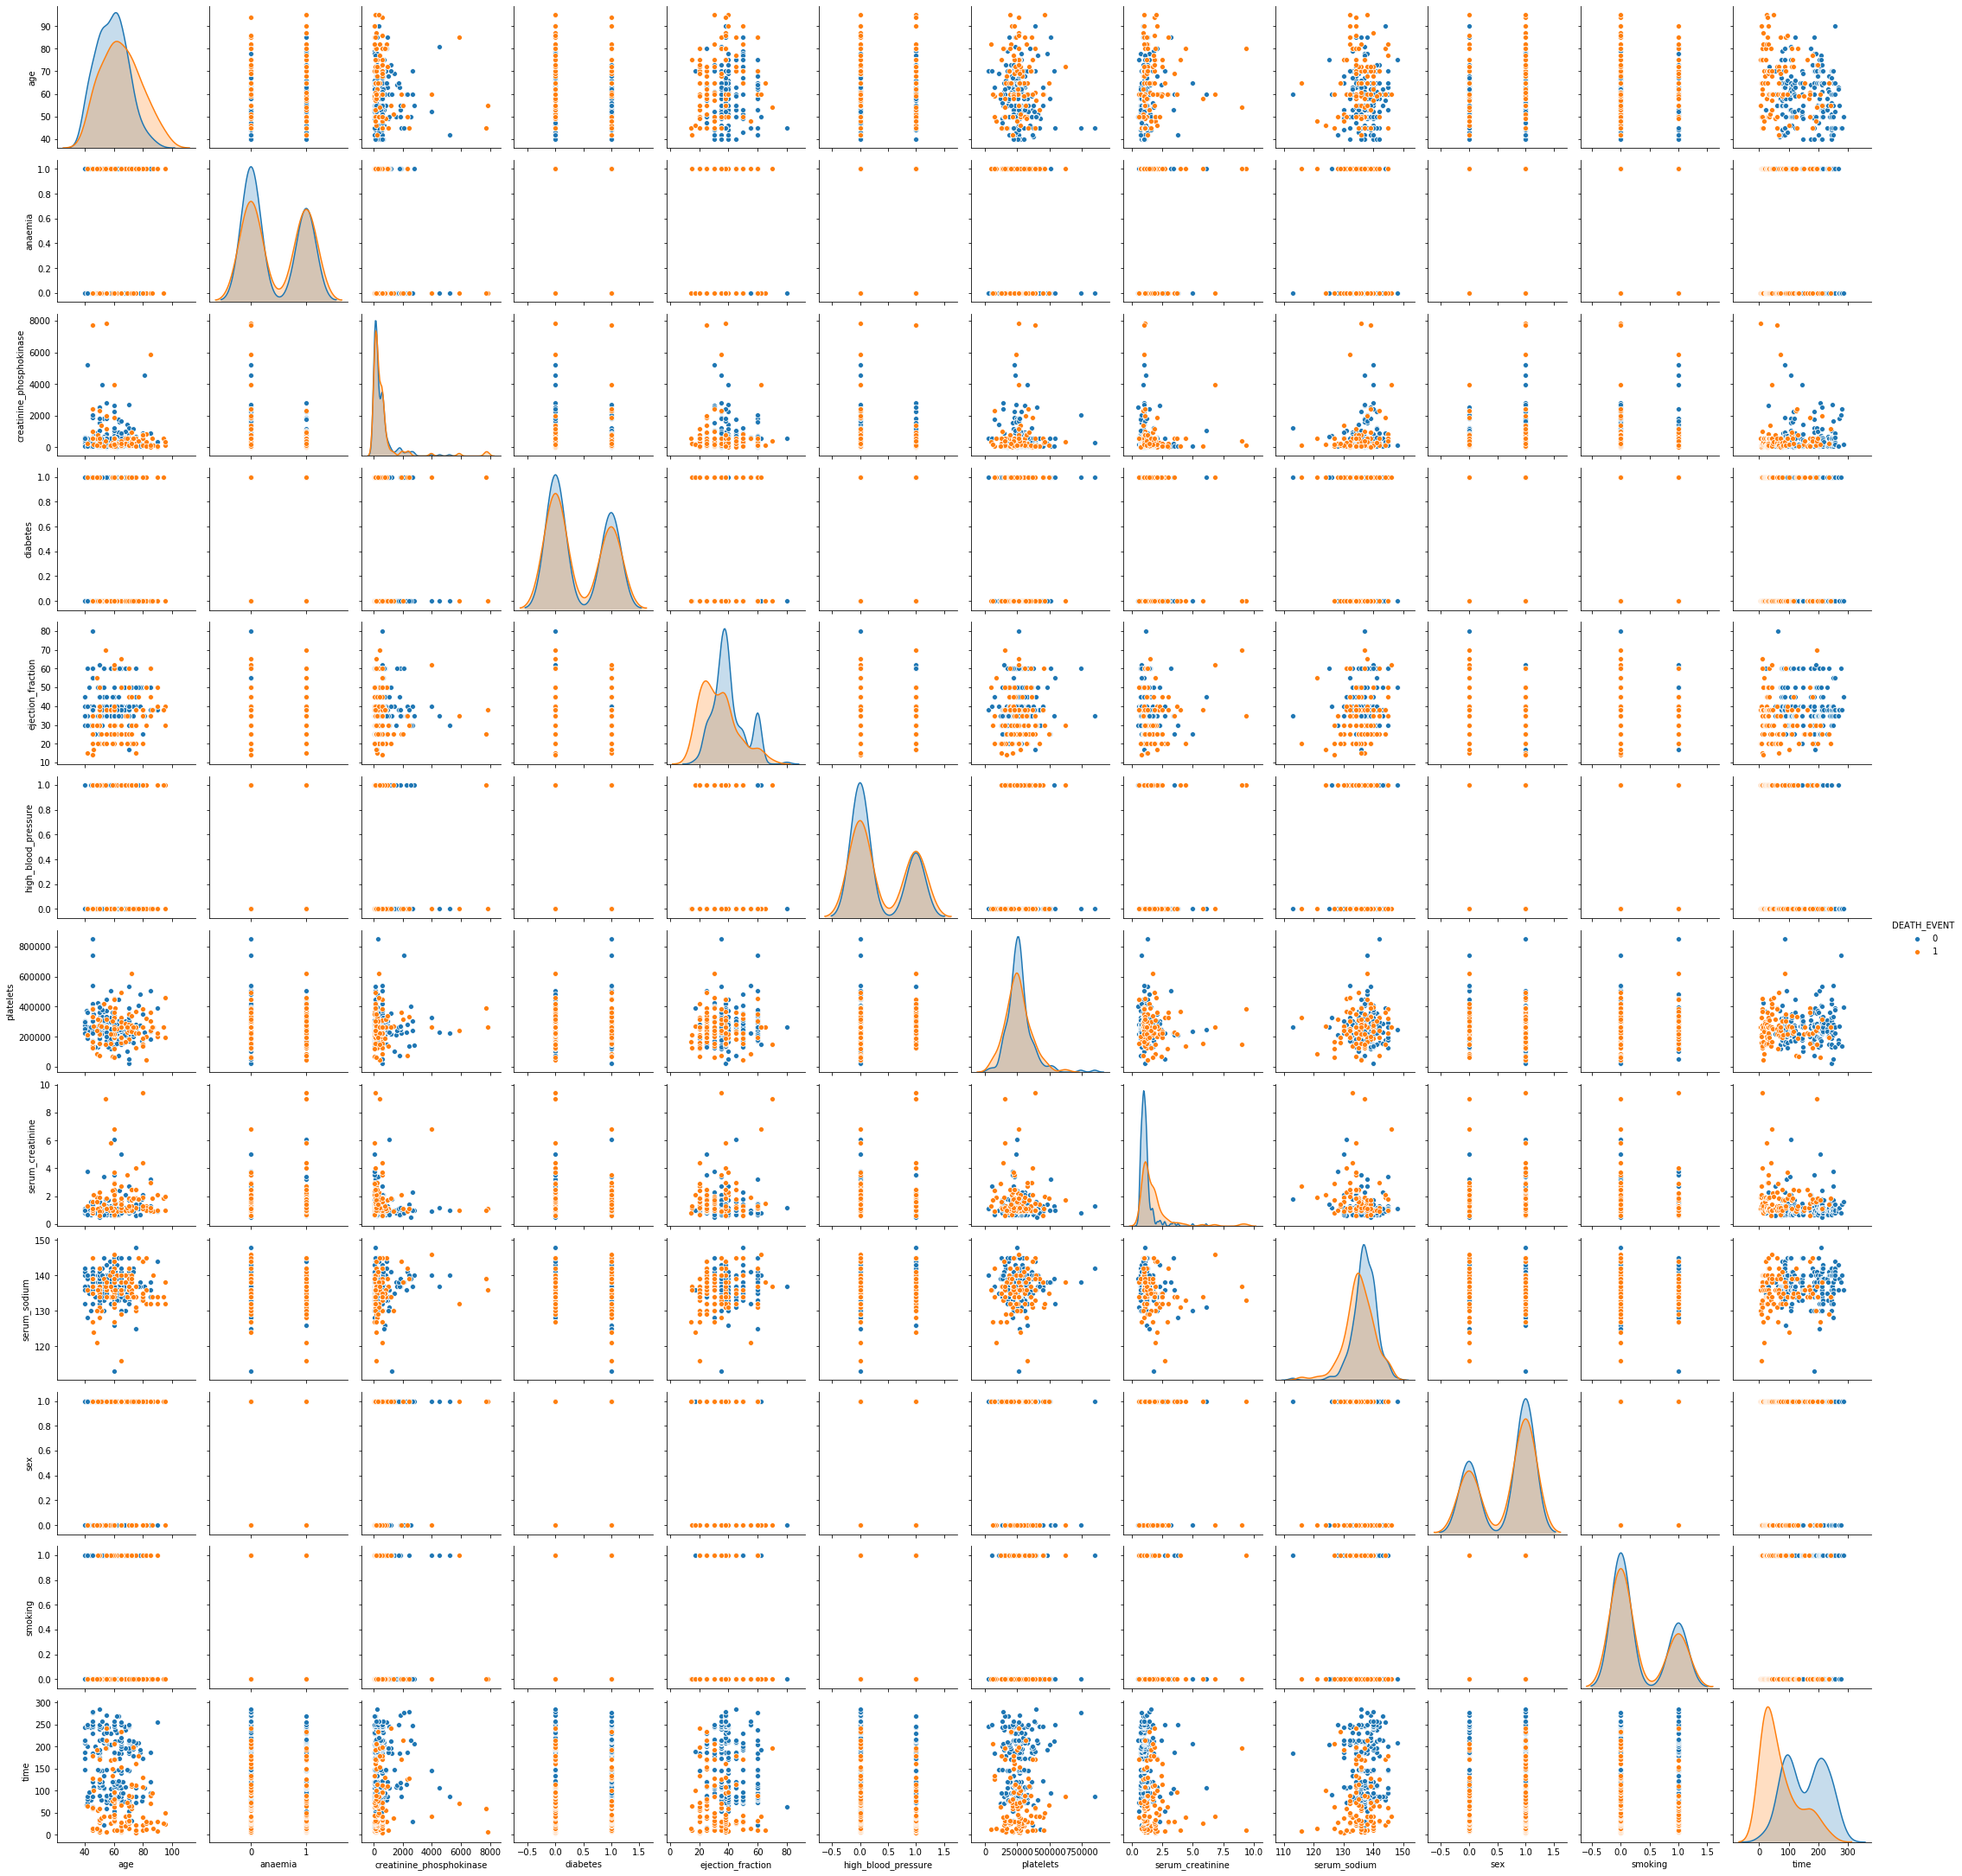

In [44]:
#it will take some time for kernel to run as we print the graphs for 12 features(12X12)
#double click for zoom in for your interest area-graph
sns.pairplot(data, hue='DEATH_EVENT')

The following sum of subplots tries to show us some interesting medical information.

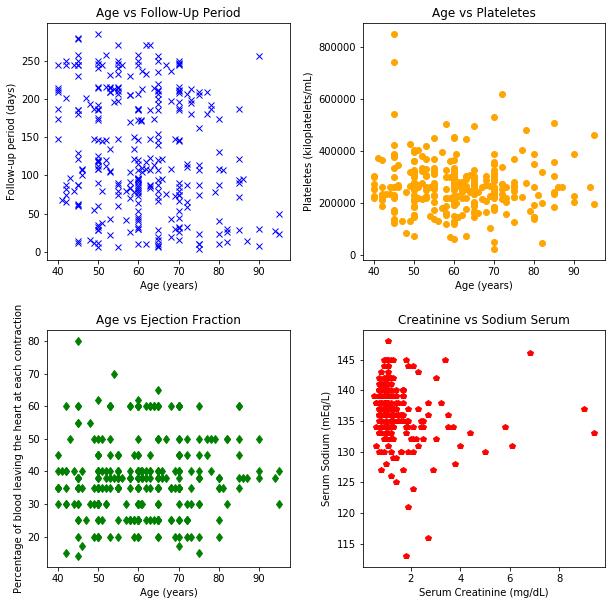

In [45]:
# chart size
plt.figure(figsize=(10,10))
    
# chart with 2Χ2 subplot
    
plt.subplot(2,2,1) # 1st(up left) 
plt.plot(data.age, data.time, ls ='', color='blue', marker='x')
plt.xlabel('Age (years)') # horizontal axis name
plt.ylabel('Follow-up period (days)') # vertical axis name
plt.title('Age vs Follow-Up Period') # chart title
    
plt.subplot(2,2,2) # 2nd(up right) 
plt.plot(data.age, data.platelets, ls ='', color='orange', marker='o')
plt.xlabel('Age (years)') # horizontal axis name
plt.ylabel('Plateletes (kiloplatelets/mL)') # vertical axis name
plt.title('Age vs Plateletes') # chart title

plt.subplot(2,2,3) # 3rd(down left)
plt.plot(data.age, data.ejection_fraction, ls ='', color='green', marker='d')
plt.xlabel('Age (years)') # horizontal axis name
plt.ylabel('Percentage of blood leaving the heart at each contraction')  # vertical axis name
plt.title('Age vs Ejection Fraction') # chart title

plt.subplot(2,2,4) # 4th(down right)
plt.plot(data.serum_creatinine, data.serum_sodium, ls ='', color='red', marker='p')
plt.xlabel('Serum Creatinine (mg/dL)') # horizontal axis name
plt.ylabel('Serum Sodium (mEq/L)')   # vertical axis name
plt.title('Creatinine vs Sodium Serum') # chart title

plt.subplots_adjust(hspace=0.3, wspace=0.3) # empty space between subplots

# Splitting the dataset into training and testing data  🤖

In [46]:
#inputs
X = data[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]

#output
y= data['DEATH_EVENT']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#### 🆘 Important

The **test_size** is generally expected to be around 20-30 % of  our dataset. By changing this number we can see diffent Succes Rates in our algorithms.After many combinations, we find that one of the bests is **"test_size=0.25**. You can try changing them to see new results for our following Model Evaluations.

## Decision Tree 🌳 

#### 1. Importing algorithm's library

In [48]:
from sklearn import tree

#### 2. Select a specific learning algorithm (Decision Tree) & set hyperparameters

In [49]:
dtree = tree.DecisionTreeClassifier("entropy", max_depth=4)

#### 3. Train our model

In [50]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 4. Model evaluation

In [51]:
y_pred_dt = dtree.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_dt)
accuracy_score_dt = accuracy_score(y_test, y_pred_dt)

print('Success Rate =', accuracy_score_dt)

Success Rate = 0.7866666666666666


#### 5. Model visualization

[Text(744.0, 1467.72, 'X[11] <= 74.0\nentropy = 0.911\nsamples = 224\nvalue = [151, 73]'),
 Text(279.0, 1141.56, 'X[11] <= 15.5\nentropy = 0.657\nsamples = 59\nvalue = [10, 49]'),
 Text(186.0, 815.4000000000001, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(372.0, 815.4000000000001, 'X[0] <= 66.5\nentropy = 0.764\nsamples = 45\nvalue = [10, 35]'),
 Text(186.0, 489.24, 'X[6] <= 379500.0\nentropy = 0.918\nsamples = 27\nvalue = [9, 18]'),
 Text(93.0, 163.08000000000015, 'entropy = 0.976\nsamples = 22\nvalue = [9, 13]'),
 Text(279.0, 163.08000000000015, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(558.0, 489.24, 'X[4] <= 47.5\nentropy = 0.31\nsamples = 18\nvalue = [1, 17]'),
 Text(465.0, 163.08000000000015, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(651.0, 163.08000000000015, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(1209.0, 1141.56, 'X[7] <= 1.65\nentropy = 0.598\nsamples = 165\nvalue = [141, 24]'),
 Text(1023.0, 815.4000000000001, 'X[5] <= 0.5\ne

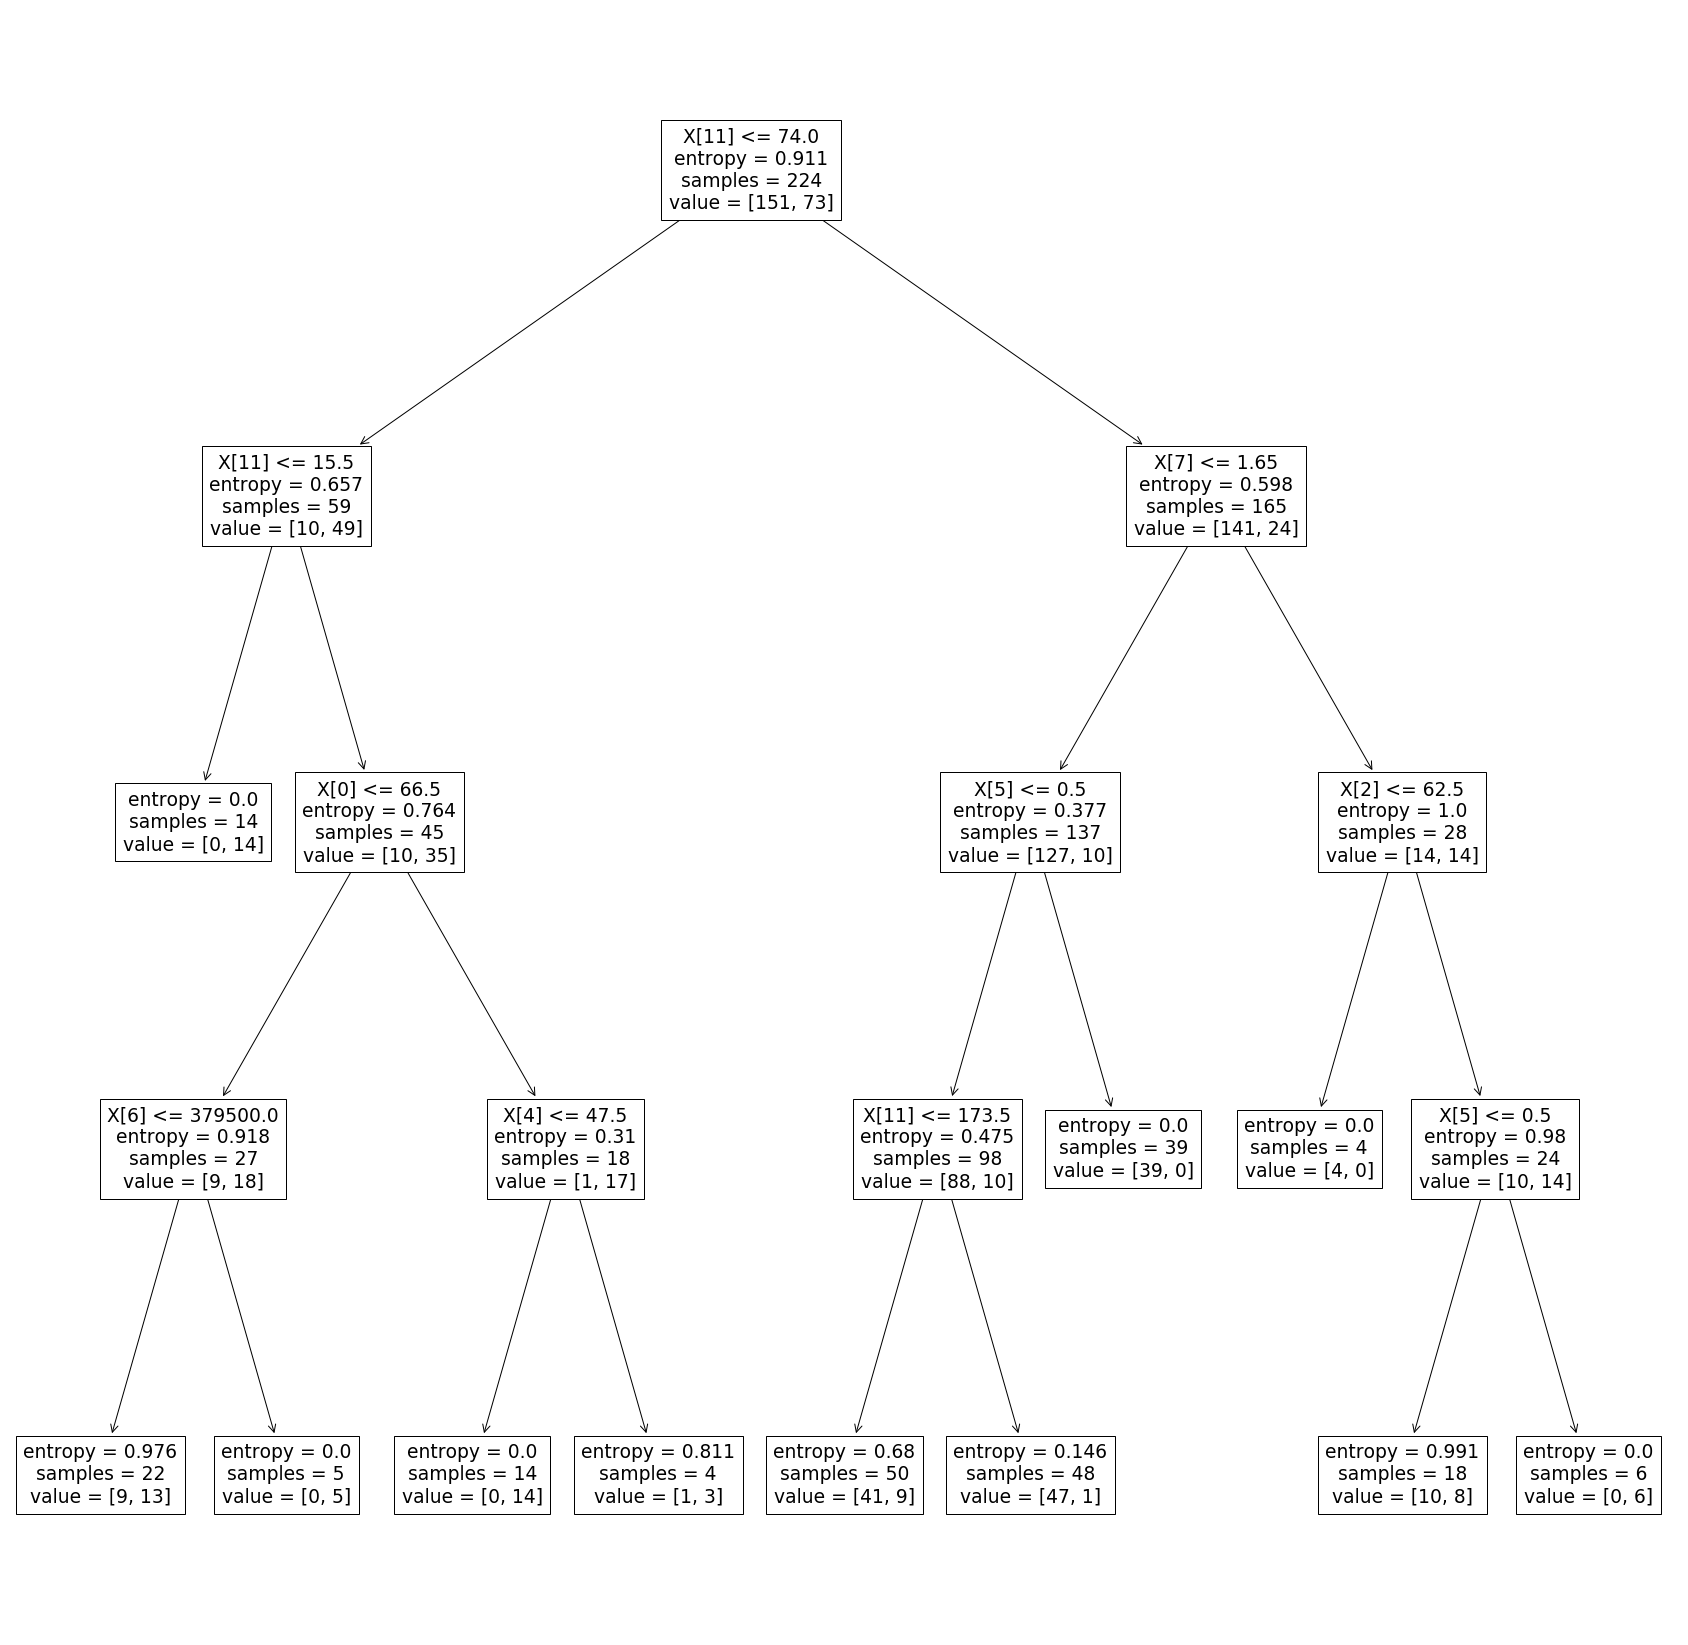

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))

tree.plot_tree(dtree.fit(X_train, y_train)) 

#### 🆘 Important

At the second step of our trainning **(2. Select a specific learning algorithm (Decision Tree) & set hyperparameters)**, when setting the hyperparameters we can change the entropy & max_depth in order to find the best possible Success Rate **(4. Model Evaluation)**. After many combinations, we find that one of the bests is **"entropy", max_depth=4**. You can try changing them to see new results in our Model Evaluation.

## 🇰- Nearest Neighbors

#### 1. Importing algorithm's library

In [3]:
from sklearn.neighbors import KNeighborsClassifier

#### 2. Select a specific learning algorithm (K-Nearest Neighbors) & set hyperparameters

In [4]:
knnClass = KNeighborsClassifier(n_neighbors=7)

#### 3. Train our model

In [56]:
knnClass.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

#### 4. Model evaluation

In [57]:
y_pred_kn = knnClass.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_kn)
accuracy_score_kn = accuracy_score(y_test, y_pred_kn)

print('Success Rate =', accuracy_score_kn)

Success Rate = 0.64


#### 5. Changing the K value in order to find the best possible performance

In [59]:
knn_performance=[]

for k in range(1,65):
  knnClass = KNeighborsClassifier(n_neighbors=k)
  knnClass.fit(X_train, y_train)
  pred_knn = knnClass.predict(X_test)
  score = accuracy_score(y_test, pred_knn)
  knn_performance.append(score)
  print("No. K of Neighbors =",k, "    Success Rate: ",score)
print()
print("The best possible rate is ",max(knn_performance),"for Κ =",knn_performance.index(max(knn_performance))+1)

No. K of Neighbors = 1     Success Rate:  0.56
No. K of Neighbors = 2     Success Rate:  0.68
No. K of Neighbors = 3     Success Rate:  0.56
No. K of Neighbors = 4     Success Rate:  0.6666666666666666
No. K of Neighbors = 5     Success Rate:  0.6266666666666667
No. K of Neighbors = 6     Success Rate:  0.6933333333333334
No. K of Neighbors = 7     Success Rate:  0.64
No. K of Neighbors = 8     Success Rate:  0.6666666666666666
No. K of Neighbors = 9     Success Rate:  0.5866666666666667
No. K of Neighbors = 10     Success Rate:  0.6933333333333334
No. K of Neighbors = 11     Success Rate:  0.6933333333333334
No. K of Neighbors = 12     Success Rate:  0.68
No. K of Neighbors = 13     Success Rate:  0.68
No. K of Neighbors = 14     Success Rate:  0.68
No. K of Neighbors = 15     Success Rate:  0.6533333333333333
No. K of Neighbors = 16     Success Rate:  0.6933333333333334
No. K of Neighbors = 17     Success Rate:  0.6666666666666666
No. K of Neighbors = 18     Success Rate:  0.69333333

#### 🆘 Important

At the second step of our trainning **(2. Select a specific learning algorithm (K Nearest Neighbors) & set hyperparameters)**, when setting the hyperparameters we can change the number of neighbors **(n_neighbors=...)** in order to find the best possible Success Rate **(4. Model Evaluation)**. After many combinations, we find that one of the bests is **"n_neighbors=7**. 
This is also proven at our fifth step **(5. Changing the K value in order to find the best possible performance)** where we find the Success Rate for No. of Neighbors from 1 to 64. The best ones are for n_neighbors= **2** & **7**.


## Random Forest 🏞️

#### 1. Importing algorithm's library

In [60]:
from sklearn.ensemble import RandomForestClassifier

#### 2. Select a specific learning algorithm (Random Forest) & set hyperparameters

In [61]:
rf = RandomForestClassifier(n_estimators=800,max_features = 7)

#### 3. Train our model

In [62]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 4. Model evaluation

In [63]:
y_pred_test_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test_rf)
accuracy_score_rf = accuracy_score(y_test, y_pred_test_rf)

print('Success Rate =', accuracy_score_rf)

Success Rate = 0.84


#### 🆘 Important

At the second step of our trainning **(2. Select a specific learning algorithm (Random Forest) & set hyperparameters)**, when setting the hyperparameters we can change the no. of estimators & the maximum features to take in account in order to find the best possible Success Rate **(4. Model Evaluation)**. After many combinations, we find that one of the bests is **n_estimators=800,max_features = 7**. You can try changing them to see new results in our Model Evaluation.

#### 5. Feature Importance Visualization 

The following graph represents the features of our dataset based on their importance for our Machine Learning Algorithms.

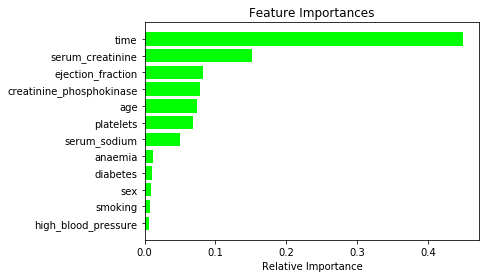

In [65]:
features = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='lime', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### 🆘 Important
We can observe that the "time" (follow-up period in days) is the most important feature of our dataset. On the other hand the feature "sex" is the least important.

## Conclusion 🏁

All the algorithms that we used are considered some of the most fundamentals. They are considered very powerful and easy to understand and use. In our case the best algorithm was **Random Forest** with a success rate of **88%**. In contrary, the least effective algorithm for our case was the **K-Nearest Neighbors** with a success rate of **68%**.


ML algorithms in combination with a good dataset can become a very powerful tool that can be used to solve certain problems. It is relatively a new science with many of its fundamentals based on older formulas. Nowadays more and more people, companies and industries understand it's potential. It's future is certainly bright!!! 
